In [1]:
import pandas as pd  #data analysis modelling purpose for regression, analysis and all
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #for adv visualisation, analysis
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#readind data
covid=pd.read_csv("covid19.csv")
covid.head(10)
#covid.tail() for last 5 rows

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,1/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,1/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,1/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,1/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,1/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


In [4]:
print("size/shape of dataset",covid.shape)
print("checking for null values",covid.isnull().sum()) #data clensing returns count of null values
print("checking data type",covid.dtypes)

size/shape of dataset (18327, 8)
checking for null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
checking data type SNo                 int64
ObservationDate    object
Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object


In [5]:
#droppping the sn no column
covid.drop(["SNo"],1,inplace=True)

In [6]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [7]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [8]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [9]:
#grouping different types of cases per the date dot aggregation methods
datewise= covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [10]:
print("basic information")
print("total number of confirmed cases",datewise["Confirmed"].iloc[-1])
print("total number of recovered cases",datewise["Recovered"].iloc[-1])
print("total number of deaths",datewise["Deaths"].iloc[-1])
print("total number of active cases",datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("total number of active cases",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])


basic information
total number of confirmed cases 2811193
total number of recovered cases 793601
total number of deaths 197159
total number of active cases 1820433
total number of active cases 990760


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

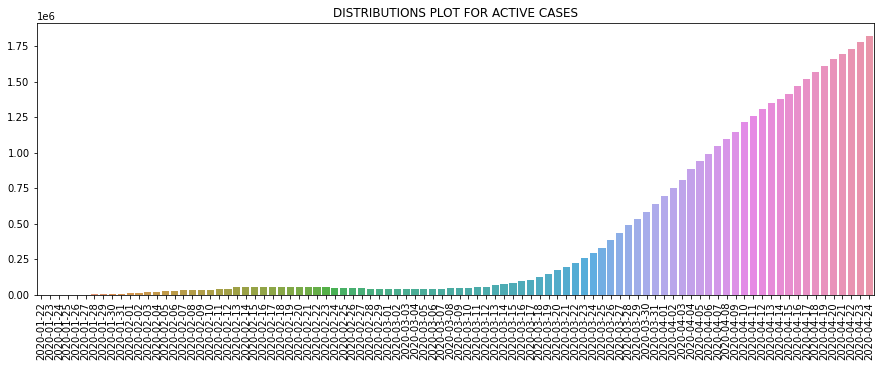

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("DISTRIBUTIONS PLOT FOR ACTIVE CASES")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

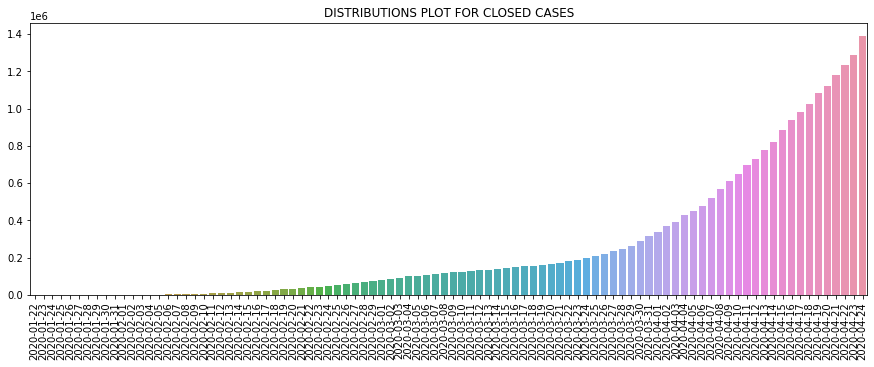

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Recovered"]-datewise["Deaths"])
plt.title("DISTRIBUTIONS PLOT FOR CLOSED CASES")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'weekly progress of the diff cases')

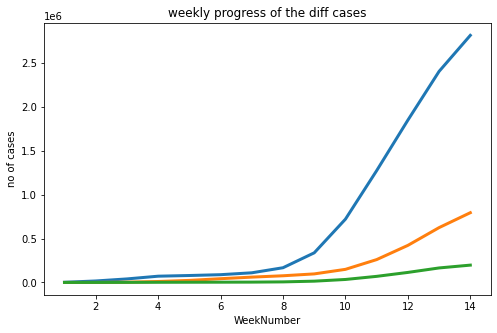

In [13]:
datewise["WeekOfYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
  weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
  week_num.append(w)
  w+=1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)  
plt.plot(week_num,weekwise_deaths,linewidth=3)  
plt.xlabel("WeekNumber")
plt.ylabel("no of cases")
plt.title("weekly progress of the diff cases")


Text(0.5, 1.0, 'weekly increase in no of death cases')

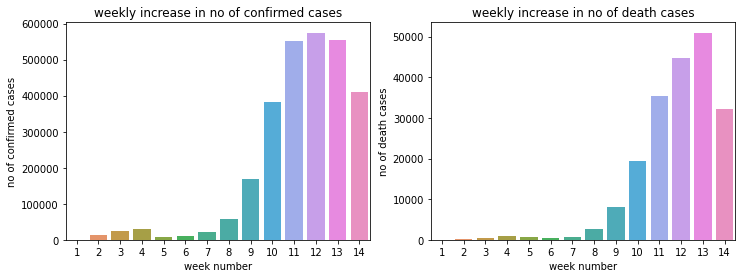

In [15]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num, y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num, y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week number")
ax2.set_xlabel("week number")
ax1.set_ylabel("no of confirmed cases")
ax2.set_ylabel("no of death cases")
ax1.set_title("weekly increase in no of confirmed cases")
ax2.set_title("weekly increase in no of death cases")

average inc in no of confirmed cases everyday 29900.0
average inc in no of recovered cases everyday 8442.0
average inc in no of deaths everyday 2097.0


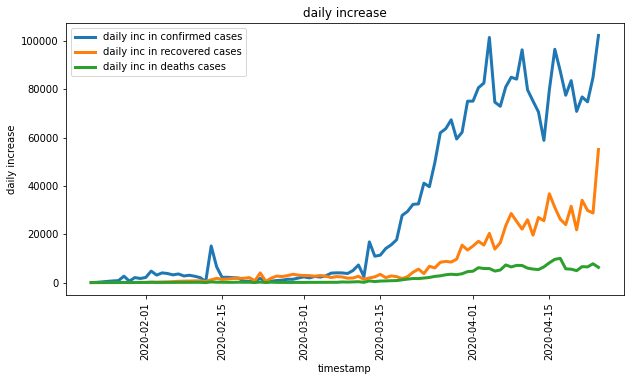

In [17]:
#average increase
print("average inc in no of confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("average inc in no of recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("average inc in no of deaths everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(10,5))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="daily inc in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="daily inc in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="daily inc in deaths cases",linewidth=3)
plt.xlabel("timestamp")
plt.ylabel("daily increase")
plt.title("daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [18]:
#country wise analysis of mortality=death-recovered cases

countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


Text(0.5, 1.0, 'top 15 countries as per confirmed cases')

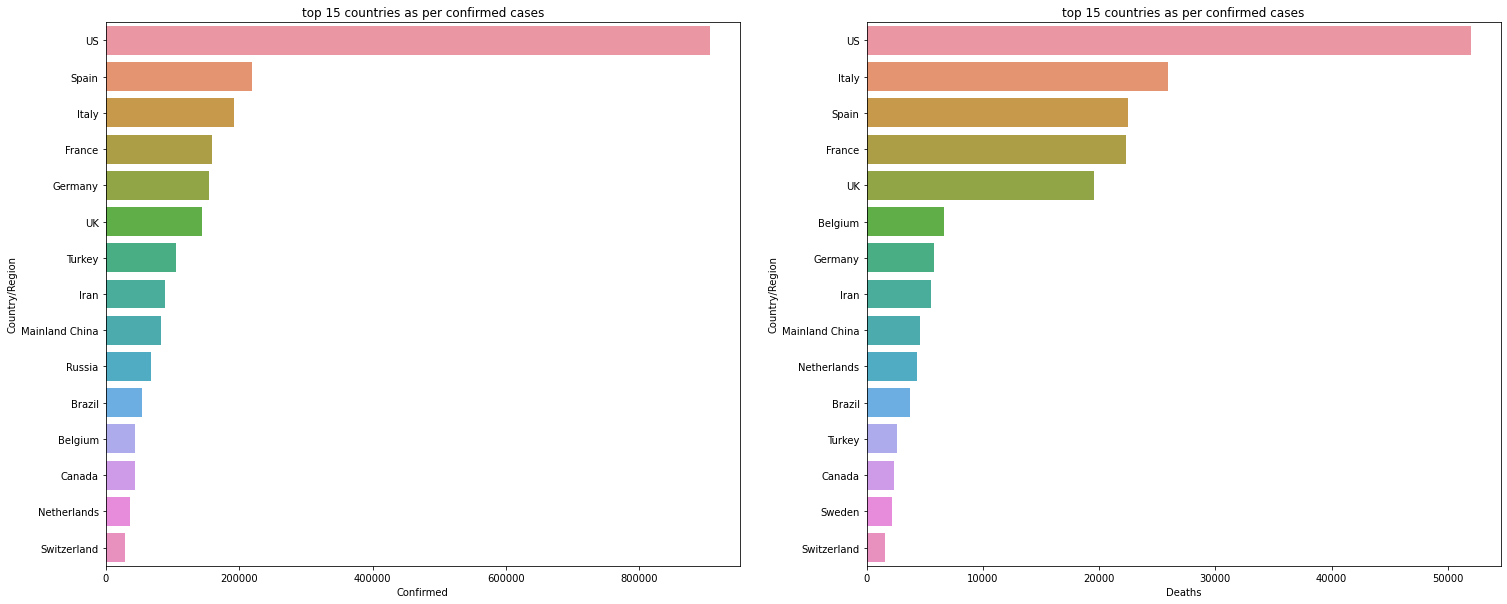

In [20]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(25,10))
top15c=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top15d=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top15c["Confirmed"],y=top15c.index,ax=ax1)
ax1.set_title("top 15 countries as per confirmed cases")
sns.barplot(x=top15d["Deaths"],y=top15d.index,ax=ax2)
ax2.set_title("top 15 countries as per confirmed cases")

In [23]:
#data analysis for india
india=covid[covid["Country/Region"]=="India"]
datewiseindia=india.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewiseindia.iloc[-1])
print("total active cases",datewiseindia["Confirmed"].iloc[-1]-datewiseindia["Recovered"].iloc[-1]-datewiseindia["Deaths"].iloc[-1])
print("total closed cases",datewiseindia["Recovered"].iloc[-1]+datewiseindia["Deaths"].iloc[-1])

Confirmed    24530
Recovered     5498
Deaths         780
Name: 2020-04-24 00:00:00, dtype: int64
total active cases 18252
total closed cases 6278


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'weekly progress of the diff cases in india')

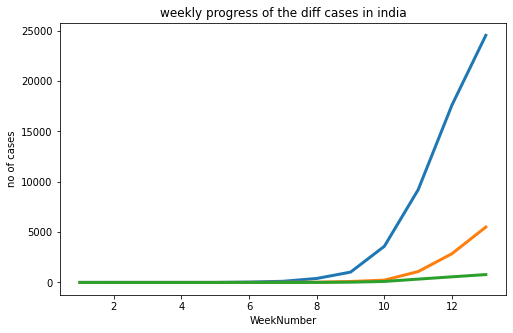

In [26]:
datewiseindia["WeekOfYear"]=datewiseindia.index.weekofyear
week_numindia=[]
weekwise_confirmedindia=[]
weekwise_recoveredindia=[]
weekwise_deathsindia=[]
w=1
for i in list(datewiseindia["WeekOfYear"].unique()):
  weekwise_confirmedindia.append(datewiseindia[datewiseindia["WeekOfYear"]==i]["Confirmed"].iloc[-1])
  weekwise_recoveredindia.append(datewiseindia[datewiseindia["WeekOfYear"]==i]["Recovered"].iloc[-1])
  weekwise_deathsindia.append(datewiseindia[datewiseindia["WeekOfYear"]==i]["Deaths"].iloc[-1])
  week_numindia.append(w)
  w+=1
plt.figure(figsize=(8,5))
plt.plot(week_numindia,weekwise_confirmedindia,linewidth=3)
plt.plot(week_numindia,weekwise_recoveredindia,linewidth=3)  
plt.plot(week_numindia,weekwise_deathsindia,linewidth=3)  
plt.xlabel("WeekNumber")
plt.ylabel("no of cases")
plt.title("weekly progress of the diff cases in india")

In [29]:
maxind=datewiseindia["Confirmed"].max()
chinadata=covid[covid["Country/Region"]=="Mainland China"]
italydata=covid[covid["Country/Region"]=="Italy"]
usdata=covid[covid["Country/Region"]=="US"]
spaindata=covid[covid["Country/Region"]=="Spain"]

datewisechina=chinadata.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewiseitaly=italydata.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewiseus=usdata.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewisespain=spaindata.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("it took", datewiseindia[datewiseindia["Confirmed"]>0].shape[0],"days in india to reach",maxind,"confirmed cases")
print("it took", datewisechina[(datewisechina["Confirmed"]>0)&(datewisechina["Confirmed"]<=maxind)].shape[0],"days in china to reach no of confirmed cases")
print("it took", datewiseus[(datewiseus["Confirmed"]>0)&(datewiseus["Confirmed"]<=maxind)].shape[0],"days in us to reach confirmed cases")
print("it took", datewiseitaly[(datewiseitaly["Confirmed"]>0)&(datewiseitaly["Confirmed"]<=maxind)].shape[0],"days in italy to reachconfirmed cases")
print("it took", datewisespain[(datewisespain["Confirmed"]>0)&(datewisespain["Confirmed"]<=maxind)].shape[0],"days in spain to reachconfirmed cases")


it took 86 days in india to reach 24530 confirmed cases
it took 14 days in china to reach no of confirmed cases
it took 59 days in us to reach confirmed cases
it took 44 days in italy to reachconfirmed cases
it took 49 days in spain to reachconfirmed cases


In [31]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]= datewise["Days Since"].dt.days
train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [32]:
linreg=LinearRegression(normalize=True)
svm= SVR(C=1, degree=5,kernel='poly',epsilon=0.001)
linreg.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train["Days Since"]).reshape(-1,1),np.array(train["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
predictionvalidlinreg=linreg.predict(np.array(valid["Days Since"]).reshape(-1,1))
predictionsvm=svm.predict(np.array(valid["Days Since"]).reshape(-1,1))

In [37]:
newdate=[]
newpredictionlr=[]
newpredictionsvm=[]
for i in range(1,18):
  newdate.append(datewise.index[-1]+timedelta(days=i))
  newpredictionlr.append(linreg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  newpredictionsvm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x) 
modelprediction=pd.DataFrame(zip(newdate,newpredictionlr,newpredictionsvm),columns=["Dates","lr","svr"])
modelprediction.head(10) 

,Dates,lr,svr
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245
5,2020-04-30,1668980,4292557
6,2020-05-01,1690670,4511540
7,2020-05-02,1712360,4739461
8,2020-05-03,1734050,4976588
9,2020-05-04,1755740,5223200


In [38]:
#time series analysis
#compare approx nearer
modeltrain=datewise.iloc[:int(datewise.shape[0]*0.85)]
vali=datewise.iloc[:int(datewise.shape[0]*0.85):]

In [39]:
holt=Holt(np.asarray(modeltrain["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred=vali.copy()
y_pred["Holt"]=holt.forecast(len(vali))

In [45]:
holtnewdate=[]
holtnewprediction=[]
for i in range(1,18):
  holtnewdate.append(datewise.index[-1]+timedelta(days=i))
  holtnewprediction.append(holt.forecast((len(vali)+i))[-1])
modelprediction["Holts Linear Model prediction"]=holtnewprediction
modelprediction.head(10)  

,Dates,lr,svr,Holts Linear Model prediction
0,2020-04-25,1560529,3322586,7889231
1,2020-04-26,1582219,3500761,7967887
2,2020-04-27,1603909,3686599,8046543
3,2020-04-28,1625599,3880344,8125199
4,2020-04-29,1647289,4082245,8203855
5,2020-04-30,1668980,4292557,8282511
6,2020-05-01,1690670,4511540,8361167
7,2020-05-02,1712360,4739461,8439823
8,2020-05-03,1734050,4976588,8518479
9,2020-05-04,1755740,5223200,8597135
